In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [2]:
# Read in the training data
train_data = np.genfromtxt('mnist_train.csv', delimiter=',')
# The first row is the headers so we drop it
train_data = train_data[1:]

# Set up image data and labels
x_train = train_data[:,1:]
y_train = train_data[:,0]

In [3]:
# Read in the testing data
test_data = np.genfromtxt('mnist_test.csv', delimiter=',')
# The first row is the headers so we drop it
test_data = test_data[1:]

# Set up image data and labels
x_test = test_data[:,1:]
y_test = test_data[:,0]

In [4]:
# Form the image data into 28x28 arrays since the data is originally 1D arrays
x_train = x_train.reshape((60000, 28, 28))
x_test = x_test.reshape((10000, 28, 28))

In [5]:
# Filter out the digits which aren't 0 or 1
train_mask = (y_train == 7) | (y_train == 1)

x_train_masked = x_train[train_mask]
y_train_masked = y_train[train_mask]

In [6]:
test_mask = (y_test == 7) | (y_test == 1)
x_test_masked = x_test[test_mask]
y_test_masked = y_test[test_mask]

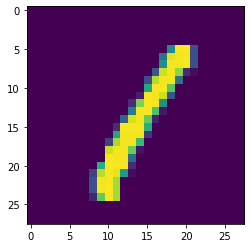

In [7]:
plt.imshow(x_train_masked[0])

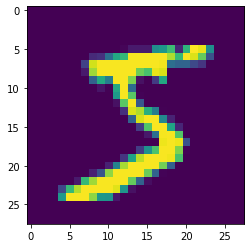

In [8]:
plt.imshow(x_train[0])

In [9]:
import MyClassifier_10 as cl

In [10]:
classifier = cl.MyClassifier(0, 0)

In [11]:
classifier.train(1, 7, 1, x_train, y_train)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +2.926e+00  +8.750e+02  +5e+04  9e-01  1e+02  1e+00  2e+00    ---    ---    1  1  - |  -  - 
 1  +1.211e+01  +3.645e+02  +3e+04  2e-01  4e+01  1e+00  1e+00  0.6239  3e-01   1  1  1 |  0  0
 2  +1.631e+01  +1.573e+02  +1e+04  5e-02  2e+01  7e-01  5e-01  0.8169  3e-01   2  1  1 |  0  0
 3  +9.613e+00  +6.258e+01  +5e+03  1e-02  7e+00  2e-01  2e-01  0.8601  3e-01   2  1  1 |  0  0
 4  +2.047e+00  +9.366e+00  +7e+02  2e-03  1e+00  3e-02  3e-02  0.8579  3e-03   2  1  1 |  0  0
 5  +3.185e-02  +1.294e-01  +9e+00  2e-05  1e-02  4e-04  4e-04  0.9868  2e-04   1  1  1 |  0  0
 6  +3.526e-04  +1.434e-03  +1e-01  3e-07  1e-04  4e-06  4e-06  0.9890  1e-04   1  1  1 |  0  0
 7  +3.904e-06  +1.589e-05  +1e-03  3e-09  2e-06  5e-08  4e-08  0.9890  1e-04   0  1  1 |  0  0
 8  +4.324e-08  +1.762e-07  +1e-05  3e-11  2e-

In [12]:
train_classes = classifier.classify(x_train_masked)
test_classes = classifier.classify(x_test_masked)

In [13]:
# Compute the accuracy for the classifications
train_accuracy = sum(abs(train_classes == y_train_masked)) / len(y_train_masked)
test_accuracy = sum(abs(test_classes == y_test_masked)) / len(y_test_masked)

In [14]:
train_accuracy

1.0

In [15]:
test_accuracy

0.9921405455386038

In [16]:
# A function which applies noise to the training or testing data
def apply_error(images, p):
    corrupt_images = images.copy()
    for i, image in enumerate(images):
        error = np.random.random((28, 28)) >= p
        corrupt_image = image * error
        corrupt_images[i] = corrupt_image
    return corrupt_images

In [17]:
corrupt_x_test_masked = apply_error(x_test_masked, 0.6)
corrupt_test_classes = classifier.classify(corrupt_x_test_masked)
corrupt_test_accuracy = sum(abs(corrupt_test_classes == y_test_masked)) / len(y_test_masked)

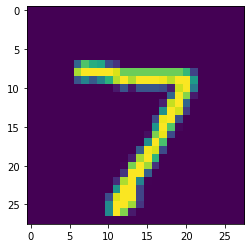

In [18]:
plt.imshow(x_test_masked[0])

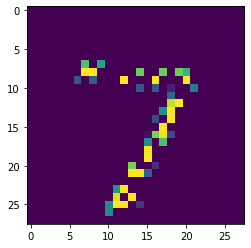

In [19]:
plt.imshow(corrupt_x_test_masked[0])

In [20]:
corrupt_test_accuracy

0.7979657882570504

In [21]:
def apply_average(images):
    average_images = np.empty(images.shape, dtype=float)

    for i, image in enumerate(images):

        image = image.reshape(784)
        def average_image(image):

            side_length = int((image.size)**(1/2))
            new_image = np.empty(image.size, dtype=float)
    
            for index, x in enumerate(image):
                right = index + 1
                left = index - 1
                above = index - side_length
                below = index + side_length
                leftup = index - (side_length+1)
                leftdown = index + (side_length-1)
                rightup = index - (side_length-1)
                rightdown = index + (side_length+1)

                if index % side_length == 0: #On the left boarder
                    neighbor_arrayindex = np.array([above, below, right, rightup, rightdown])
                elif index % side_length == (side_length-1): #On the right boarder
                    neighbor_arrayindex = np.array([above, below, left, leftup, leftdown])
                else:
                    neighbor_arrayindex = np.array([above,below,right,rightup,rightdown,left,leftup,leftdown])

                neighbor_arrayindex = np.array([x for x in neighbor_arrayindex if x<image.size and x>=0])
                neighbor_count = neighbor_arrayindex.size
                neighbors = np.array(image[neighbor_arrayindex])

                new_image[index] = sum(neighbors)/neighbor_count

            return new_image

        average_images[i] = average_image(image).reshape(28,28)
        
    return average_images

In [22]:
regen_x_test_masked = apply_average(corrupt_x_test_masked)
regen_test_classes = classifier.classify(regen_x_test_masked)
regen_test_accuracy = sum(abs(regen_test_classes == y_test_masked)) / len(y_test_masked)


In [23]:
regen_test_accuracy

0.955617198335645

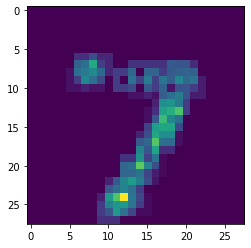

In [24]:
plt.imshow(regen_x_test_masked[0])